In [133]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


### Load data and prepare train n test sets

In [134]:
DATA_PATH = "dataset/"
FEATURE = "PAAC"

train_neg = pd.read_csv(DATA_PATH + FEATURE + "_TR_neg_SPIDER.csv")
train_pos = pd.read_csv(DATA_PATH + FEATURE + "_TR_pos_SPIDER.csv")
test_neg = pd.read_csv(DATA_PATH + FEATURE + "_TS_neg_SPIDER.csv")
test_pos = pd.read_csv(DATA_PATH + FEATURE + "_TS_pos_SPIDER.csv")

In [135]:
train_frames = [train_neg, train_pos]
test_frames = [test_neg, test_pos]

In [136]:
train_df= pd.concat(train_frames)
test_df = pd.concat(test_frames)

In [137]:
print(train_df.shape)
print(test_df.shape)

(2542, 28)
(461, 28)


### Feature engineering

In [138]:
# Check for null values

print(train_df.isnull().sum())
print(test_df.isnull().sum())

seq_name     0
PAAC1        0
PAAC2        0
PAAC3        0
PAAC4        0
PAAC5        0
PAAC6        0
PAAC7        0
PAAC8        0
PAAC9        0
PAAC10       0
PAAC11       0
PAAC12       0
PAAC13       0
PAAC14       0
PAAC15       0
PAAC16       0
PAAC17       0
PAAC18       0
PAAC19       0
PAAC20       0
PAAC21       0
PAAC22       0
PAAC23       0
PAAC24       0
PAAC25       0
PAAC26       0
druggable    0
dtype: int64
seq_name     0
PAAC1        0
PAAC2        0
PAAC3        0
PAAC4        0
PAAC5        0
PAAC6        0
PAAC7        0
PAAC8        0
PAAC9        0
PAAC10       0
PAAC11       0
PAAC12       0
PAAC13       0
PAAC14       0
PAAC15       0
PAAC16       0
PAAC17       0
PAAC18       0
PAAC19       0
PAAC20       0
PAAC21       0
PAAC22       0
PAAC23       0
PAAC24       0
PAAC25       0
PAAC26       0
druggable    0
dtype: int64


In [139]:
train_set = train_df.drop(['seq_name'] , axis=1)
test_set = test_df.drop(['seq_name'] , axis=1)
print(train_set.shape)
print(test_set.shape)

(2542, 27)
(461, 27)


In [140]:
# Check for duplicates

print(train_set.duplicated().sum())
print(test_set.duplicated().sum())

4
1


In [141]:
data_types = train_set.dtypes

print(data_types)

numerical_vars = data_types[data_types != 'object'].index.tolist()

print(numerical_vars)

categorical_vars = data_types[data_types == 'object'].index.tolist()
print(categorical_vars)

PAAC1        float64
PAAC2        float64
PAAC3        float64
PAAC4        float64
PAAC5        float64
PAAC6        float64
PAAC7        float64
PAAC8        float64
PAAC9        float64
PAAC10       float64
PAAC11       float64
PAAC12       float64
PAAC13       float64
PAAC14       float64
PAAC15       float64
PAAC16       float64
PAAC17       float64
PAAC18       float64
PAAC19       float64
PAAC20       float64
PAAC21       float64
PAAC22       float64
PAAC23       float64
PAAC24       float64
PAAC25       float64
PAAC26       float64
druggable      int64
dtype: object
['PAAC1', 'PAAC2', 'PAAC3', 'PAAC4', 'PAAC5', 'PAAC6', 'PAAC7', 'PAAC8', 'PAAC9', 'PAAC10', 'PAAC11', 'PAAC12', 'PAAC13', 'PAAC14', 'PAAC15', 'PAAC16', 'PAAC17', 'PAAC18', 'PAAC19', 'PAAC20', 'PAAC21', 'PAAC22', 'PAAC23', 'PAAC24', 'PAAC25', 'PAAC26', 'druggable']
[]


In [142]:
y_train = train_set.druggable
y_test = test_set.druggable
X_train = train_set.drop(['druggable'] , axis=1)
X_test = test_set.drop(['druggable'] , axis=1)

In [143]:
# Normalize data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train)

# Apply the scaling transformation to both the training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
df_train_scaled = pd.DataFrame(X_train)

y_train.tail(10)

1213    1
1214    1
1215    1
1216    1
1217    1
1218    1
1219    1
1220    1
1221    1
1222    1
Name: druggable, dtype: int64

### Models

In [145]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [146]:
# Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

accuracy, sensitivity, specificity, precision, f1_measure = {}, {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(y_test, predictions)
    sensitivity[key] = recall_score(y_test, predictions)
    specificity[key] = recall_score(y_test, predictions, pos_label=0)
    precision[key] = precision_score(y_test, predictions)
    f1_measure[key] = f1_score(y_test, predictions)

/Users/meelanbandara/Desktop/Development/Druggable-Protein/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [147]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Sensitivity'] = sensitivity.values()
df_model['Specificity'] = specificity.values()
df_model['Precision'] = precision.values()
df_model['F1-Score'] = f1_measure.values()

df_model

,Accuracy,Sensitivity,Specificity,Precision,F1-Score
Logistic Regression,0.902386,0.883929,0.919831,0.912442,0.897959
Support Vector Machines,0.893709,0.875000,0.911392,0.903226,0.888889
Decision Trees,0.804772,0.767857,0.839662,0.819048,0.792627
Random Forest,0.878525,0.808036,0.945148,0.932990,0.866029
Naive Bayes,0.759219,0.834821,0.687764,0.716475,0.771134
K-Nearest Neighbor,0.835141,0.866071,0.805907,0.808333,0.836207


/var/folders/cp/jcg5psf9275f55pn3w9ysfrr0000gn/T/ipykernel_75506/2726708816.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


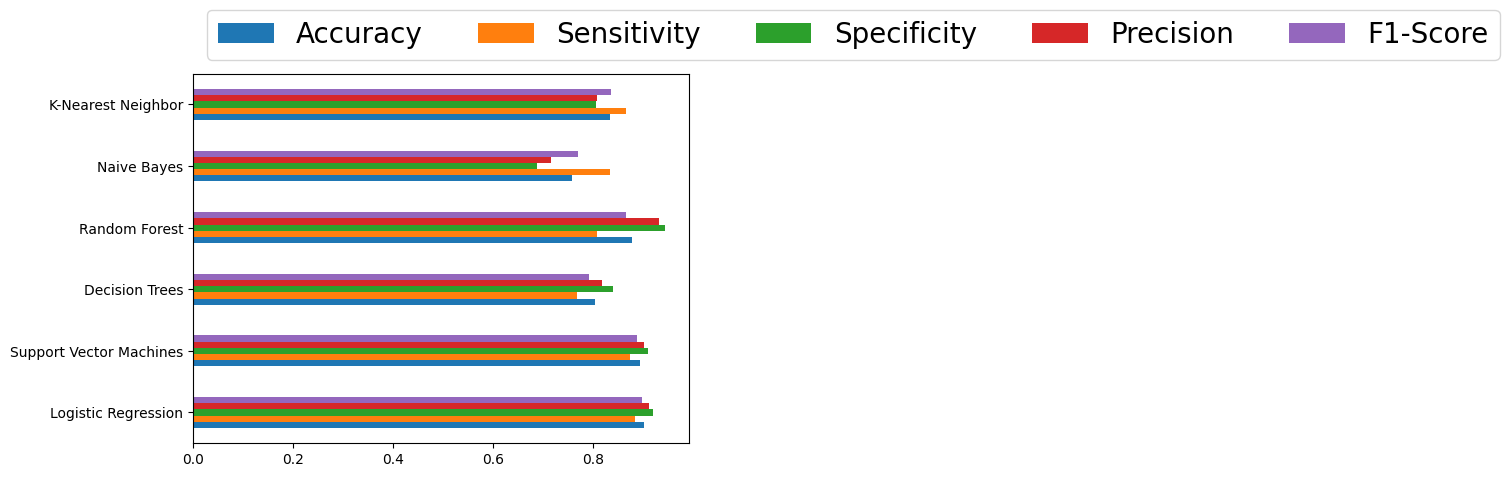

In [148]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 20}
)
plt.tight_layout()